In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Assignment 1: Image Negative on Different Image Types**

**Objective:** Understand how image negative behaves on different intensity distributions.

**Tasks:**
* Apply image negative to: a grayscale natural image, a low-light image, a high-contrast image.
* Display original vs transformed images side-by-side.
* Plot histograms of original and negative images.

**Questions for Analysis:**
* What happens to the histogram after negation?
    **Ans** : The histogram is flipped horizontally.
* In what kind of images is negative transformation useful?
    **Ans** :
    | Image Type                      | Why it helps                                  |
| ------------------------------- | --------------------------------------------- |
| **Low-light images**            | Hidden details in dark regions become visible |
| **Medical images (X-ray, MRI)** | Bright structures become easier to detect     |
| **Satellite images**            | Improves visibility of land/water boundaries  |
| **Old scanned documents**       | Enhances faded text                           |



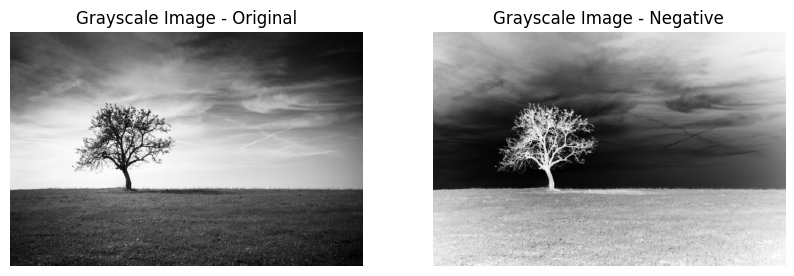

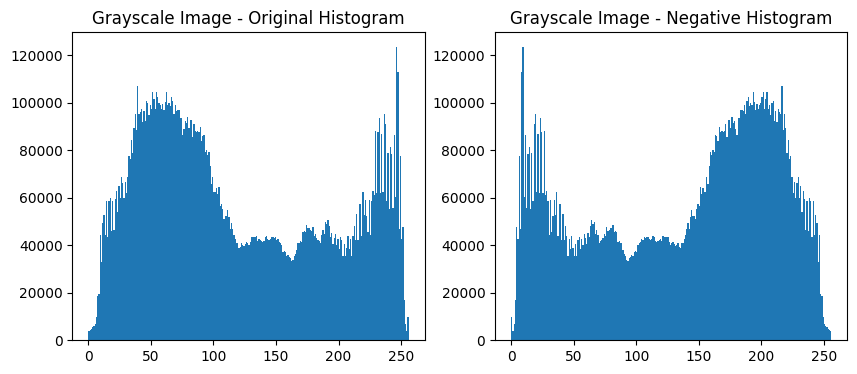

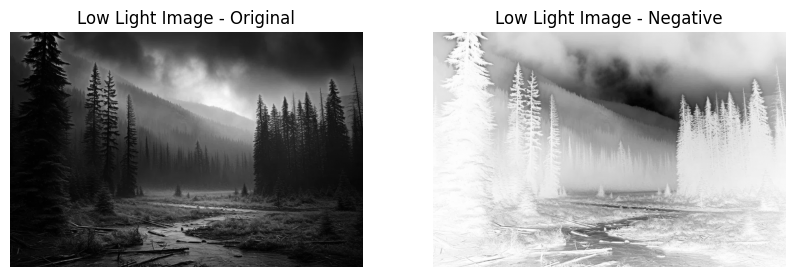

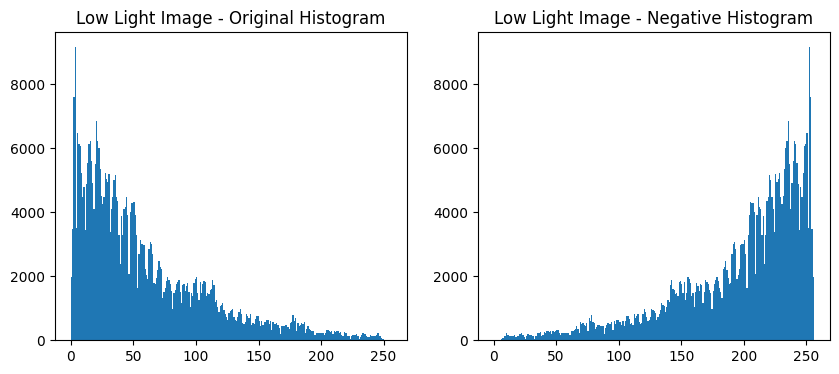

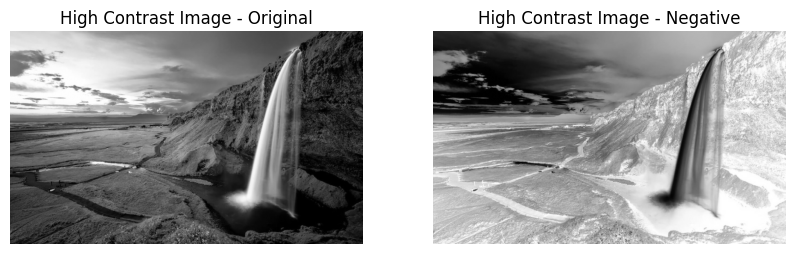

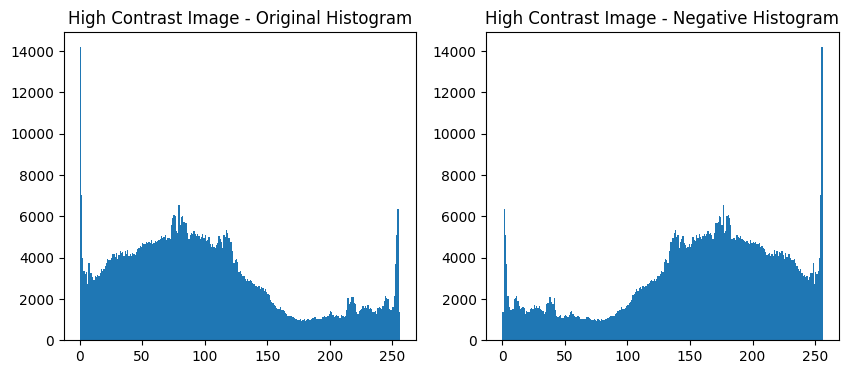

In [3]:
def image_negative(img):
    return 255 - img

def process_image(image_path, title):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    neg = image_negative(img)

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{title} - Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(neg, cmap='gray')
    plt.title(f"{title} - Negative")
    plt.axis("off")

    plt.show()

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.hist(img.ravel(), bins=256, range=[0,256])
    plt.title(f"{title} - Original Histogram")

    plt.subplot(1,2,2)
    plt.hist(neg.ravel(), bins=256, range=[0,256])
    plt.title(f"{title} - Negative Histogram")

    plt.show()


process_image("grayscale.jpg", "Grayscale Image")
process_image("low_light.webp", "Low Light Image")
process_image("high_contrast.jpeg", "High Contrast Image")


# **Assignment 2: Log Transformation for Dynamic Range Compression**

**Objective:** Study the effect of log transformation on images with large intensity variations.

**Tasks:**
* Apply log transformation with different scaling constants c.
* Use at least three values of c and compare outputs.
* Apply log transform to: A dark image, An image with bright highlights.

**Questions for Analysis:**
* Why does log transformation enhance dark regions?\
    **Ans** : Because logarithmic function expands small values. So, Dark pixels become much brighter and Bright pixels increase only slightly.
* What happens if c is too large?\
    **Ans** : Image becomes over bright \& details get washed out


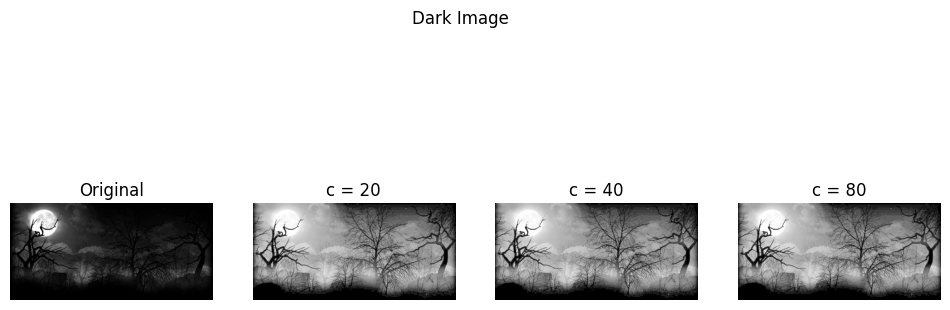

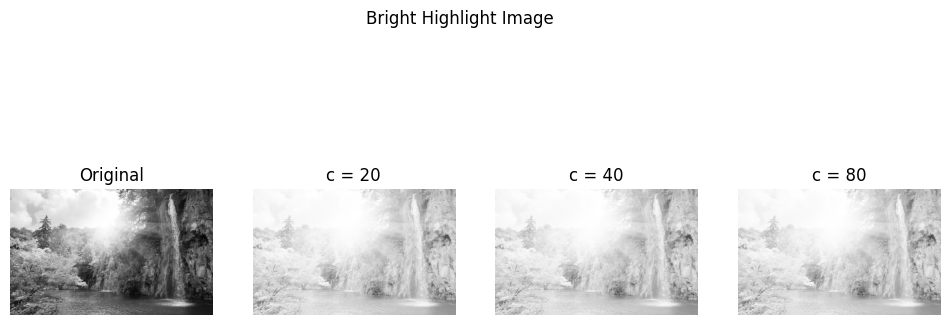

In [4]:
def log_transform(img, c):
    img = img.astype(np.float32)
    log_img = c * np.log(1 + img)
    log_img = np.uint8(255 * log_img / np.max(log_img))   # normalize
    return log_img


def process(image_path, title):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    c_values = [20, 40, 80]

    plt.figure(figsize=(12,5))
    plt.subplot(1,4,1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis("off")

    for i, c in enumerate(c_values):
        transformed = log_transform(img, c)
        plt.subplot(1,4,i+2)
        plt.imshow(transformed, cmap='gray')
        plt.title(f"c = {c}")
        plt.axis("off")

    plt.suptitle(title)
    plt.show()


process("dark_image.jpg", "Dark Image")
process("bright_highlight.jpg", "Bright Highlight Image")

# **Assignment 3: Gamma Transformation - Visual Perception Study**

**Objective:** Understand gamma correction and its perceptual impact.

**Tasks:**
* Apply gamma transformation with: γ < 1 (e.g., 0.4, 0.6), γ = 1, γ > 1 (e.g., 1.5, 2.2).
* Display results in a grid.
* Plot intensity mapping curves for each gamma.

**Questions for Analysis:**
* Which gamma values brighten the image? Why?\
    **Ans** : Gamma values γ < 1 (0.4, 0.6) brighten the image because they expand low intensity pixel values more than high ones, making dark regions lighter.
* How does gamma correction relate to human vision?\
    **Ans** : Human vision is more sensitive to changes in dark areas than bright areas. Gamma correction redistributes intensities to match this non linear perception, ensuring images look natural on displays.


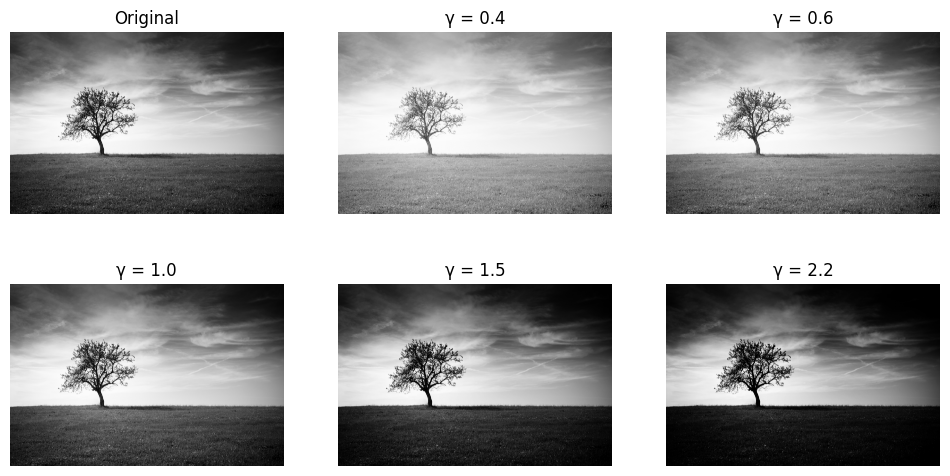

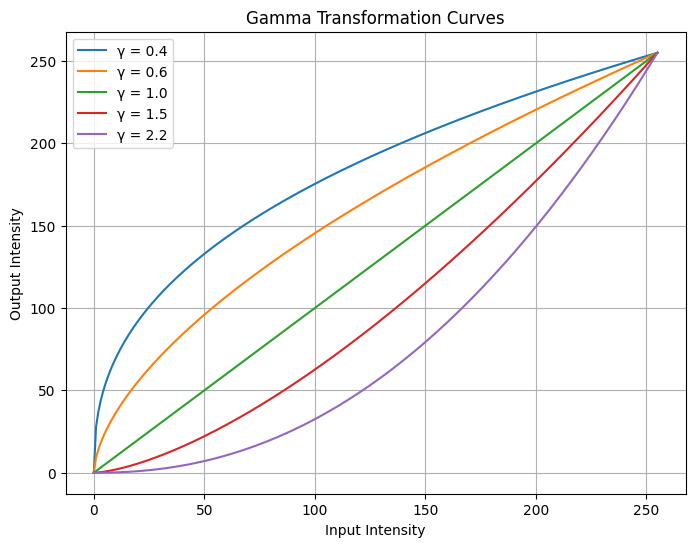

In [7]:
def gamma_transform(img, gamma):
    img = img / 255.0
    gamma_img = np.power(img, gamma)
    return np.uint8(gamma_img * 255)

img = cv2.imread("grayscale.jpg", cv2.IMREAD_GRAYSCALE)

gamma_values = [0.4, 0.6, 1.0, 1.5, 2.2]

plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

for i, g in enumerate(gamma_values):
    corrected = gamma_transform(img, g)
    plt.subplot(2,3,i+2)
    plt.imshow(corrected, cmap='gray')
    plt.title(f"γ = {g}")
    plt.axis("off")

plt.show()

x = np.linspace(0, 255, 256) / 255.0

plt.figure(figsize=(8,6))
for g in gamma_values:
    y = np.power(x, g)
    plt.plot(x*255, y*255, label=f"γ = {g}")

plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.legend()
plt.title("Gamma Transformation Curves")
plt.grid()
plt.show()


# **Assignment 4: Comparison Study (Negative vs Log vs Gamma)**

**Objective:** Compare all intensity transformations on the same image.

**Tasks:**
* Take a single grayscale image.
* Apply: Negative, Log transform, Gamma transform (γ=0.5 and 2.0).
* Show results in a single figure.

**Questions for Analysis:**
* Which method improves visibility the most?\
    **Ans** : Log transformation and γ = 0.5 improve visibility the most because they expand dark pixel values and reveal hidden details.
* Which transformation distorts the image the most?\
    **Ans** : Negative transformation distorts the image the most because it completely inverts brightness, making objects appear unnatural.


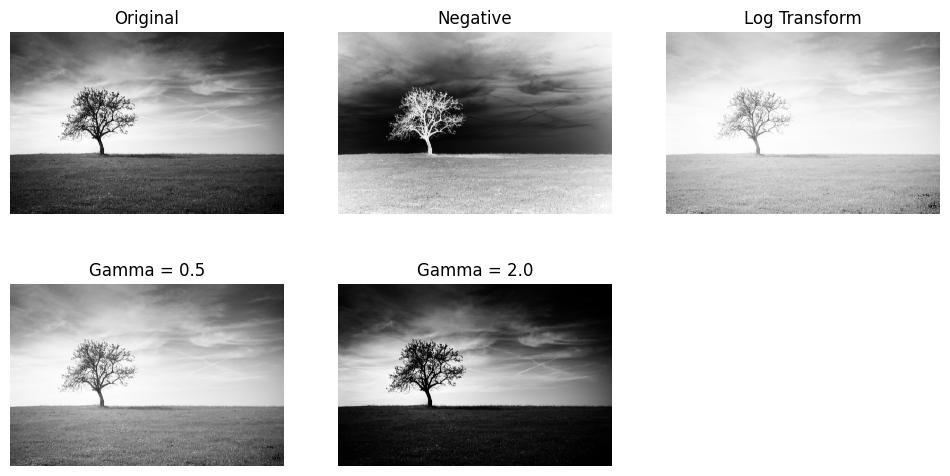

In [8]:
img = cv2.imread("grayscale.jpg", cv2.IMREAD_GRAYSCALE)

negative = 255 - img

c = 40
log_img = c * np.log(1 + img.astype(np.float32))
log_img = np.uint8(255 * log_img / np.max(log_img))

def gamma_transform(img, gamma):
    img = img / 255.0
    gamma_img = np.power(img, gamma)
    return np.uint8(gamma_img * 255)

gamma_05 = gamma_transform(img, 0.5)
gamma_20 = gamma_transform(img, 2.0)

plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(negative, cmap='gray')
plt.title("Negative")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(log_img, cmap='gray')
plt.title("Log Transform")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(gamma_05, cmap='gray')
plt.title("Gamma = 0.5")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(gamma_20, cmap='gray')
plt.title("Gamma = 2.0")
plt.axis("off")

plt.show()

# **Assignment 5: Histogram Analysis**

**Objective:** Link intensity transformation with histogram behavior.

**Tasks:**
* For each transformation (from previous assignments): Plot original histogram, Plot transformed histogram.
* Comment on histogram shifting, stretching, or compression.\

**Ans** :   
i) Negative: Histogram is mirrored around the center; dark and bright pixel distributions swap.

ii) Log Transformation: Histogram shifts toward higher intensities, compressing bright values and spreading dark ones.

iii) Gamma (γ < 1): Histogram shifts to the right, increasing brightness by expanding low-intensity pixels.

iv) Gamma (γ > 1): Histogram shifts to the left, darkening the image by compressing low-intensity pixels.




* Bonus: Try applying the transformations after histogram equalization.


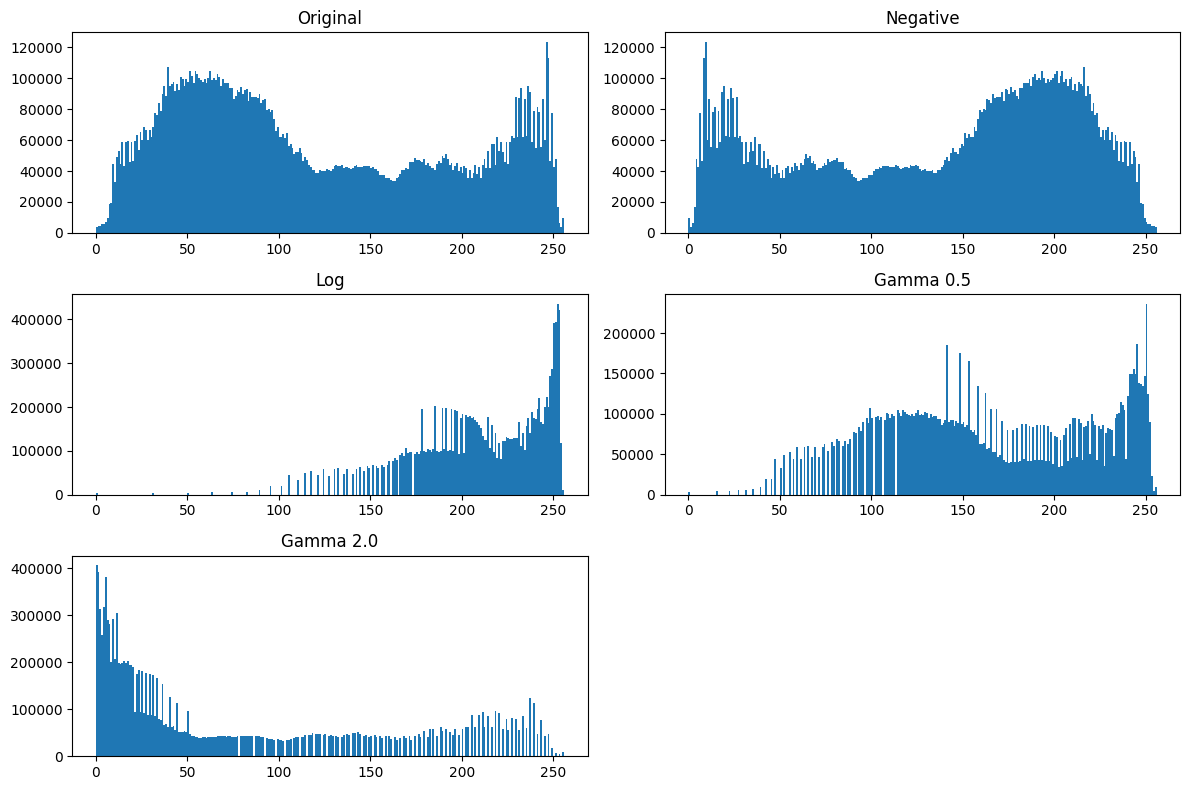

In [9]:
img = cv2.imread("grayscale.jpg", cv2.IMREAD_GRAYSCALE)

negative = 255 - img

c = 40
log_img = c * np.log(1 + img.astype(np.float32))
log_img = np.uint8(255 * log_img / np.max(log_img))

def gamma_transform(img, gamma):
    img = img / 255.0
    gamma_img = np.power(img, gamma)
    return np.uint8(gamma_img * 255)

gamma_05 = gamma_transform(img, 0.5)
gamma_20 = gamma_transform(img, 2.0)

images = [img, negative, log_img, gamma_05, gamma_20]
titles = ["Original", "Negative", "Log", "Gamma 0.5", "Gamma 2.0"]

plt.figure(figsize=(12,8))

for i in range(len(images)):
    plt.subplot(3,2,i+1)
    plt.hist(images[i].ravel(), bins=256, range=[0,256])
    plt.title(titles[i])

plt.tight_layout()
plt.show()


# **Assignment 6: Color Image Intensity Transformation**

**Objective:** Understand pitfalls of applying intensity transforms on RGB images.

**Tasks:**
* Apply gamma correction directly on RGB channels.
* Convert image to HSV or LAB and apply transformation only on the intensity channel.
* Compare results.

**Questions for Analysis:**
* Why does direct RGB transformation sometimes distort colors?\
    **Ans** : Direct RGB gamma correction changes the relative values of R, G, and B, which alters hue and saturation, causing color distortion.
* Which color space is more suitable and why?\
    **Ans** : HSV (or LAB) is more suitable because it separates intensity from color, allowing brightness to change without affecting color information.


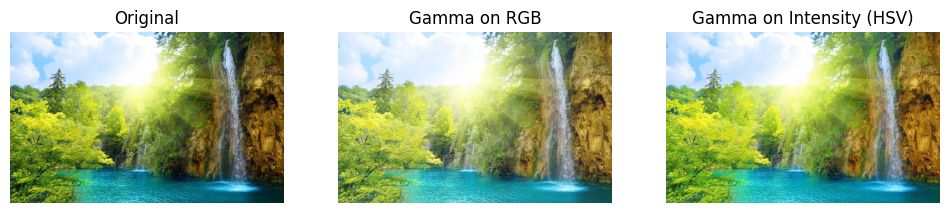

In [10]:
img = cv2.imread("bright_highlight.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def gamma_transform(img, gamma):
    img = img / 255.0
    gamma_img = np.power(img, gamma)
    return np.uint8(gamma_img * 255)

gamma = 0.6

rgb_gamma = gamma_transform(img_rgb, gamma)

hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

v_gamma = gamma_transform(v, gamma)
hsv_corrected = cv2.merge([h, s, v_gamma])
hsv_gamma = cv2.cvtColor(hsv_corrected, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(rgb_gamma)
plt.title("Gamma on RGB")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(hsv_gamma)
plt.title("Gamma on Intensity (HSV)")
plt.axis("off")

plt.show()

# **Assignment 7: Intensity Slicing (Highlighting Specific Ranges)**

**Objective:** Learn to highlight specific intensity ranges while suppressing others.

**Tasks:**
* Implement intensity slicing to: Highlight a specific range (e.g., 100-150) while making other intensities gray; Highlight a range while making others black/white.
* Apply to: A medical image to highlight potential areas of interest; A landscape image to highlight sky or vegetation.
* Display original and processed images with marked intensity ranges.

**Questions for Analysis:**
* What happens to image detail outside the highlighted range?\
    **Ans** : Image details outside the highlighted range are suppressed, so texture and structure in those regions are lost or flattened.
* How would you choose the intensity range to highlight for a specific application?\
    **Ans** : The intensity range is chosen by analyzing the histogram and selecting the pixel values corresponding to the region of interest (e.g., tissues in medical images or sky brightness in landscapes).
* Compare this approach with simple thresholding.\
    **Ans** : Intensity slicing highlights a band of values, while simple thresholding separates only foreground and background, making slicing more selective and informative.


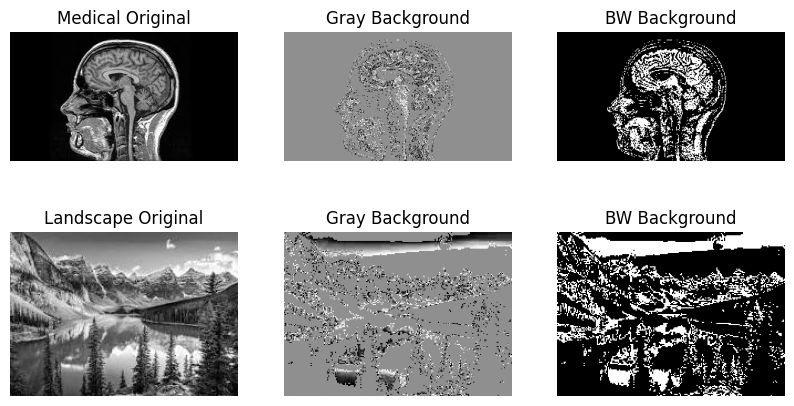

In [11]:
medical = cv2.imread("medical.jfif", cv2.IMREAD_GRAYSCALE)
landscape = cv2.imread("landscape.jfif", cv2.IMREAD_GRAYSCALE)

low, high = 100, 150

def slicing_gray(img, low, high):
    out = img.copy()
    mask = (img >= low) & (img <= high)
    out[~mask] = 128
    return out

def slicing_bw(img, low, high):
    out = np.zeros_like(img)
    mask = (img >= low) & (img <= high)
    out[mask] = 255
    return out

med_gray = slicing_gray(medical, low, high)
med_bw = slicing_bw(medical, low, high)

land_gray = slicing_gray(landscape, low, high)
land_bw = slicing_bw(landscape, low, high)

plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
plt.imshow(medical, cmap='gray')
plt.title("Medical Original")
plt.axis("off")

plt.subplot(3,3,2)
plt.imshow(med_gray, cmap='gray')
plt.title("Gray Background")
plt.axis("off")

plt.subplot(3,3,3)
plt.imshow(med_bw, cmap='gray')
plt.title("BW Background")
plt.axis("off")

plt.subplot(3,3,4)
plt.imshow(landscape, cmap='gray')
plt.title("Landscape Original")
plt.axis("off")

plt.subplot(3,3,5)
plt.imshow(land_gray, cmap='gray')
plt.title("Gray Background")
plt.axis("off")

plt.subplot(3,3,6)
plt.imshow(land_bw, cmap='gray')
plt.title("BW Background")
plt.axis("off")

plt.show()


# **Assignment 8: Multiple Transformation Combinations**

**Objective:** Explore effects of applying transformations in sequence.

**Tasks:**
* Take a low-light grayscale image.
* Apply these transformation sequences: Log transform → Contrast stretching; Gamma correction (γ=0.5) → Negative transformation; Negative → Gamma correction (γ=2.0).
* Compare results with single transformations.

**Questions for Analysis:**
* Does the order of transformations matter? Why?\
    **Ans** : Yes, order matters because each transformation changes the intensity distribution, affecting how the next transformation behaves.
* Which combination works best for low-light enhancement?\
    **Ans** : Log transform followed by contrast stretching works best for low-light images because it enhances dark regions and then expands their contrast.
* Are there mathematical properties (commutative, associative) for these operations?\
    **Ans** : These operations are not commutative or associative; changing their order produces different results because they are nonlinear.


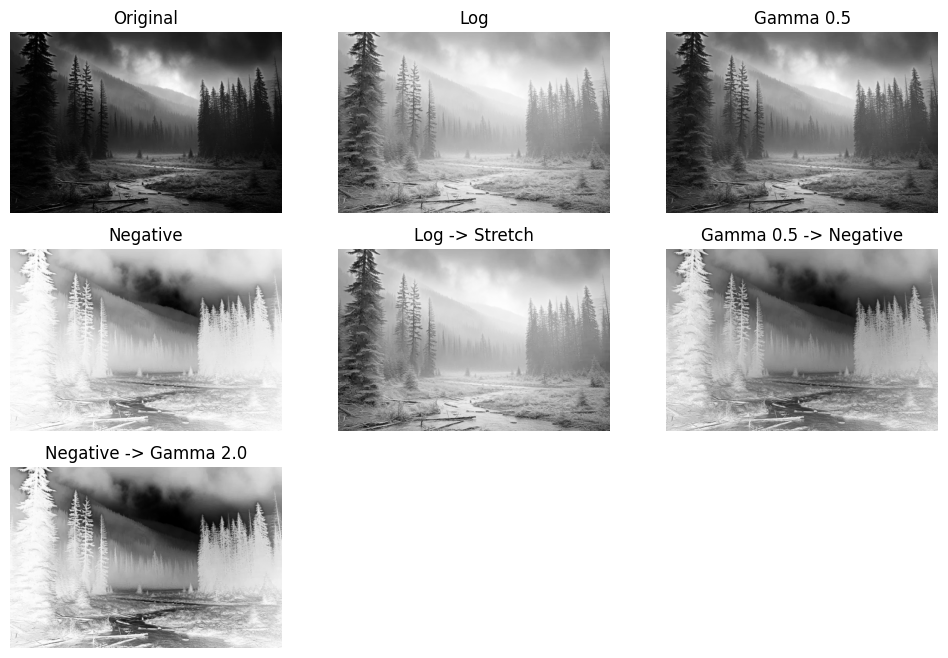

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("low_light.webp", cv2.IMREAD_GRAYSCALE)

# ---------------- Functions ----------------

def log_transform(img):
    c = 40
    img = img.astype(np.float32)
    log_img = c * np.log(1 + img)
    log_img = (log_img / np.max(log_img)) * 255
    return np.uint8(log_img)

def contrast_stretch(img):
    img = img.astype(np.float32)
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) / (max_val - min_val)
    stretched = stretched * 255
    return np.uint8(stretched)

def gamma_transform(img, gamma):
    img = img / 255.0
    gamma_img = np.power(img, gamma)
    return np.uint8(gamma_img * 255)

def negative(img):
    return 255 - img

# ---------------- Single transforms ----------------
log_img = log_transform(img)
gamma_img = gamma_transform(img, 0.5)
neg_img = negative(img)

# ---------------- Sequences ----------------
seq1 = contrast_stretch(log_transform(img))          # Log → Contrast Stretch
seq2 = negative(gamma_transform(img, 0.5))           # Gamma(0.5) → Negative
seq3 = gamma_transform(negative(img), 2.0)           # Negative → Gamma(2.0)

# ---------------- Display ----------------
plt.figure(figsize=(12,8))

titles = ["Original", "Log", "Gamma 0.5", "Negative",
          "Log -> Stretch", "Gamma 0.5 -> Negative", "Negative -> Gamma 2.0"]

images = [img, log_img, gamma_img, neg_img, seq1, seq2, seq3]

for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.show()


# **Assignment 9: Transformation on Noisy Images**

**Objective:** Understand how intensity transformations affect image noise.

**Tasks:**
* Take a clean grayscale image and add: Gaussian noise, Salt-and-pepper noise.
* Apply to noisy images: Negative transformation, Gamma correction (γ=0.5 and γ=2.0), Log transformation.
* Compare noise visibility before and after transformation.

**Questions for Analysis:**
* Which transformations amplify noise? Which suppress it?\
    **Ans** : Gamma (γ<1) and log transformation amplify noise because they boost dark intensities where noise is strong. Gamma (γ>1) suppresses noise by compressing low intensities.
* Why does negative transformation make salt-and-pepper noise more visible?\
    **Ans** : Negative swaps black and white pixels, turning salt noise into pepper and vice versa, making the impulses more visually prominent.
* Should noise reduction be applied before or after intensity transformation?\
    **Ans** : Noise reduction should be applied before intensity transformation because transformations can amplify noise and make it harder to remove later.


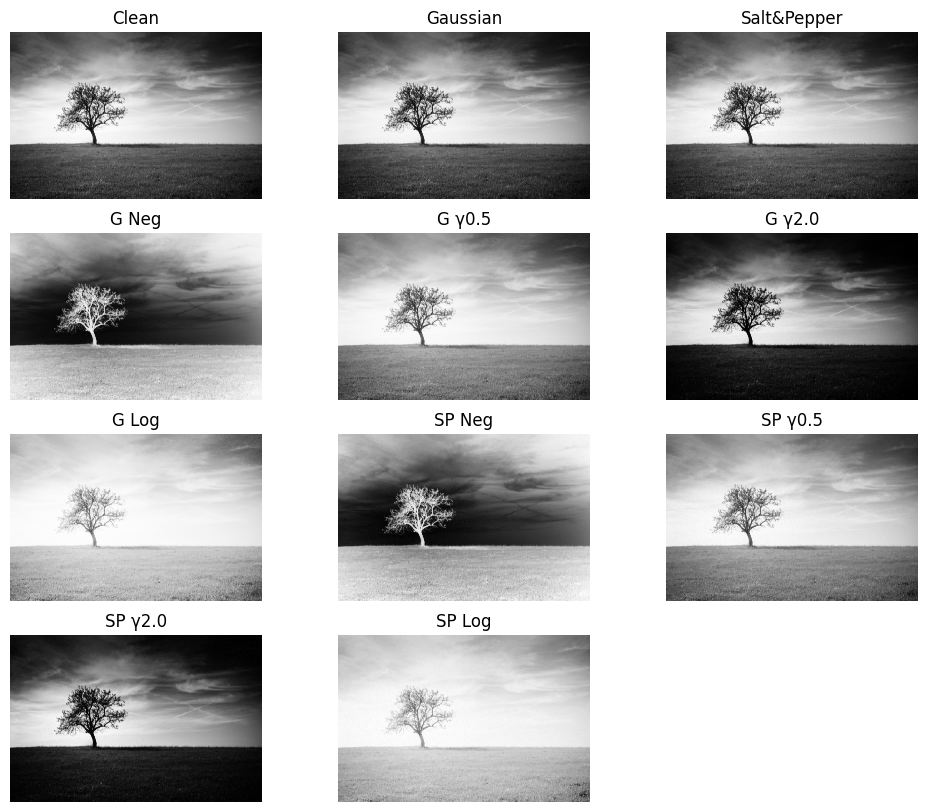

In [15]:
img = cv2.imread("grayscale.jpg", cv2.IMREAD_GRAYSCALE)

def add_gaussian(img, mean=0, std=15):
    noise = np.random.normal(mean, std, img.shape)
    noisy = img + noise
    return np.uint8(np.clip(noisy, 0, 255))

def add_salt_pepper(img, prob=0.02):
    noisy = img.copy()
    rand = np.random.rand(*img.shape)
    noisy[rand < prob/2] = 0
    noisy[rand > 1 - prob/2] = 255
    return noisy

def negative(img):
    return 255 - img

def gamma_transform(img, gamma):
    img = img / 255.0
    return np.uint8(np.power(img, gamma) * 255)

def log_transform(img):
    c = 40
    img = img.astype(np.float32)
    log_img = c * np.log(1 + img)
    log_img = (log_img / np.max(log_img)) * 255
    return np.uint8(log_img)

gaussian = add_gaussian(img)
sp = add_salt_pepper(img)

g_neg = negative(gaussian)
g_g05 = gamma_transform(gaussian, 0.5)
g_g20 = gamma_transform(gaussian, 2.0)
g_log = log_transform(gaussian)

sp_neg = negative(sp)
sp_g05 = gamma_transform(sp, 0.5)
sp_g20 = gamma_transform(sp, 2.0)
sp_log = log_transform(sp)

images = [img, gaussian, sp,
          g_neg, g_g05, g_g20, g_log,
          sp_neg, sp_g05, sp_g20, sp_log]

titles = ["Clean","Gaussian","Salt&Pepper",
          "G Neg","G γ0.5","G γ2.0","G Log",
          "SP Neg","SP γ0.5","SP γ2.0","SP Log"]

plt.figure(figsize=(12,10))
for i in range(len(images)):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.show()


# **Assignment 10: Bit-Depth Reduction Effects**

**Objective:** Study the impact of reducing bit-depth before/after transformations.

**Tasks:**
* Take an 8-bit image (0-255) and reduce to: 4 bits (16 levels), 3 bits (8 levels), 2 bits (4 levels).
* Apply transformations on: Original 8-bit image, then reduce bit-depth; Reduced bit-depth image, then apply transformations.
* Compare results and analyze contouring/banding artifacts.

**Questions for Analysis:**
* Why does banding occur after bit-depth reduction?\
    **Ans** : Banding occurs because continuous intensity ranges are quantized into a few discrete levels, creating visible steps between shades.
* Which transformations minimize banding artifacts?\
    **Ans** : Log and gamma (γ<1) transformations minimize banding by spreading low-intensity values more smoothly across available levels.
* What is the minimum bit-depth needed for acceptable visual quality?\
    **Ans** : At least 6–8 bits per pixel are needed for visually acceptable image quality without noticeable banding.


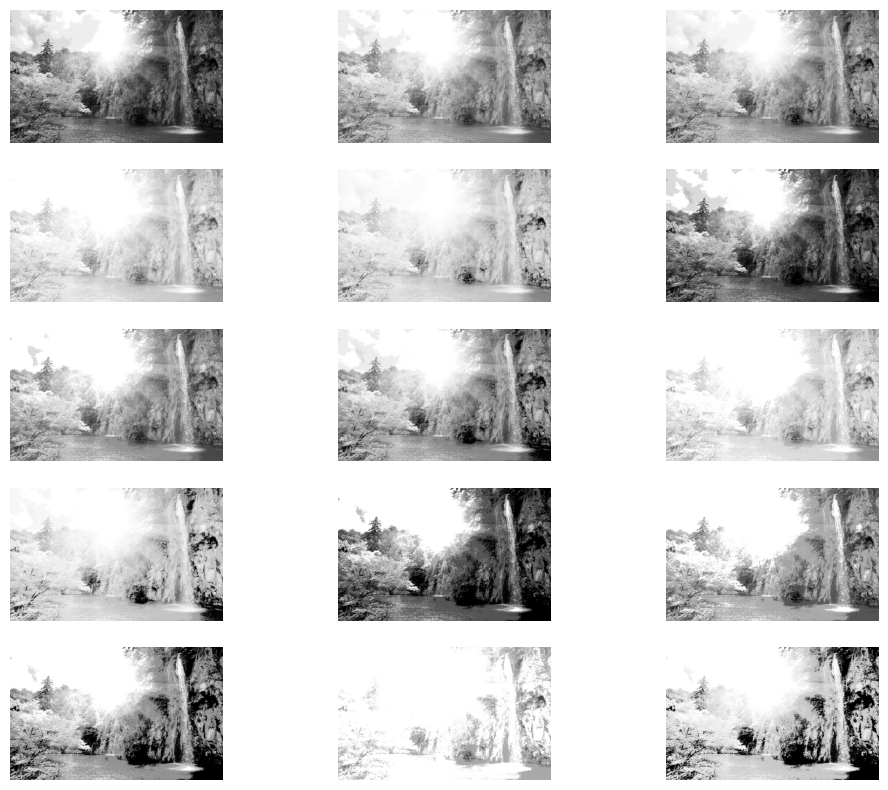

In [16]:
img = cv2.imread("bright_highlight.jpg", cv2.IMREAD_GRAYSCALE)

def reduce_bitdepth(img, bits):
    levels = 2 ** bits
    return np.uint8(np.floor(img / (256 / levels)) * (256 / levels))

def gamma_transform(img, gamma):
    img = img / 255.0
    return np.uint8(np.power(img, gamma) * 255)

def log_transform(img):
    c = 40
    img = img.astype(np.float32)
    log_img = c * np.log(1 + img)
    log_img = (log_img / np.max(log_img)) * 255
    return np.uint8(log_img)

bits_list = [4,3,2]

results = []

for b in bits_list:
    reduced = reduce_bitdepth(img, b)
    t1 = reduce_bitdepth(gamma_transform(img, 0.5), b)
    t2 = gamma_transform(reduced, 0.5)
    t3 = reduce_bitdepth(log_transform(img), b)
    t4 = log_transform(reduced)
    results.extend([reduced, t1, t2, t3, t4])

plt.figure(figsize=(12,10))
idx = 1
for r in results:
    plt.subplot(5,3,idx)
    plt.imshow(r, cmap='gray')
    plt.axis("off")
    idx += 1
plt.show()


# **Assignment 11: Transformation Parameter Optimization**

**Objective:** Learn to select optimal parameters through quantitative metrics.

**Tasks:**
* For a given image, try: 5 different gamma values (0.2, 0.5, 1.0, 1.5, 2.5); 5 different values for log transform.
* Calculate for each result: Average intensity, Contrast (standard deviation of intensities), Entropy.
* Plot parameter values vs. metrics.

**Questions for Analysis:**
* Which parameter gives maximum contrast? Maximum entropy?\
    **Ans** : The parameter that produces the highest standard deviation gives maximum contrast, and the one with the highest entropy provides the richest information content.
* Is there a single 'best' parameter for all images?\
    **Ans** : No single parameter is best for all images because optimal enhancement depends on the image’s illumination, contrast, and content.
* How would you automate parameter selection?\
    **Ans** : Parameter selection can be automated by choosing the value that maximizes contrast or entropy while keeping mean intensity within a desired range.


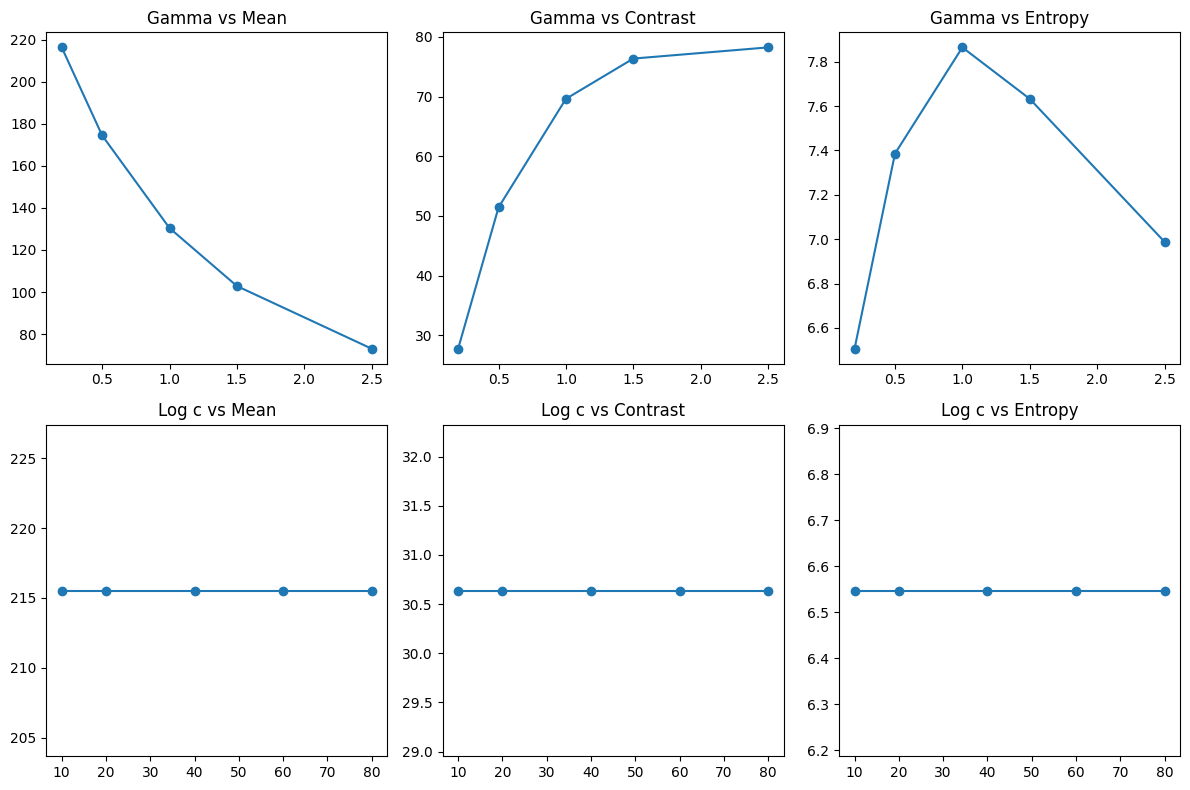

In [17]:
img = cv2.imread("bright_highlight.jpg", cv2.IMREAD_GRAYSCALE)

def gamma_transform(img, gamma):
    img = img / 255.0
    return np.uint8(np.power(img, gamma) * 255)

def log_transform(img, c):
    img = img.astype(np.float32)
    out = c * np.log(1 + img)
    out = (out / np.max(out)) * 255
    return np.uint8(out)

def entropy(img):
    hist = np.histogram(img.flatten(), bins=256, range=[0,256])[0]
    prob = hist / np.sum(hist)
    prob = prob[prob > 0]
    return -np.sum(prob * np.log2(prob))

gammas = [0.2, 0.5, 1.0, 1.5, 2.5]
cs = [10, 20, 40, 60, 80]

gamma_mean, gamma_std, gamma_ent = [], [], []
log_mean, log_std, log_ent = [], [], []

for g in gammas:
    img_g = gamma_transform(img, g)
    gamma_mean.append(np.mean(img_g))
    gamma_std.append(np.std(img_g))
    gamma_ent.append(entropy(img_g))

for c in cs:
    img_l = log_transform(img, c)
    log_mean.append(np.mean(img_l))
    log_std.append(np.std(img_l))
    log_ent.append(entropy(img_l))

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.plot(gammas, gamma_mean, marker='o')
plt.title("Gamma vs Mean")

plt.subplot(2,3,2)
plt.plot(gammas, gamma_std, marker='o')
plt.title("Gamma vs Contrast")

plt.subplot(2,3,3)
plt.plot(gammas, gamma_ent, marker='o')
plt.title("Gamma vs Entropy")

plt.subplot(2,3,4)
plt.plot(cs, log_mean, marker='o')
plt.title("Log c vs Mean")

plt.subplot(2,3,5)
plt.plot(cs, log_std, marker='o')
plt.title("Log c vs Contrast")

plt.subplot(2,3,6)
plt.plot(cs, log_ent, marker='o')
plt.title("Log c vs Entropy")

plt.tight_layout()
plt.show()


# **Assignment 12: Binary Image Operations**

**Objective:** Understand basic binary image transformations.

**Tasks:**
* Convert a grayscale image to binary using: Fixed threshold (e.g., 128), Otsu's method (automatic threshold).
* Apply to binary image: Negative (inversion), Morphological operations (erosion/dilation with 3x3 structuring element).
* Display all intermediate results.

**Questions for Analysis:**
* What information is lost in binary conversion?\
    **Ans** : All gray-level detail and texture are lost, leaving only object and background.
* How does negative affect object/background relationships?\
    **Ans** : Negative swaps object and background, reversing which regions are treated as foreground.
* What practical applications use binary image operations?\
    **Ans** : Binary operations are used in document scanning, OCR, medical segmentation, and object detection.


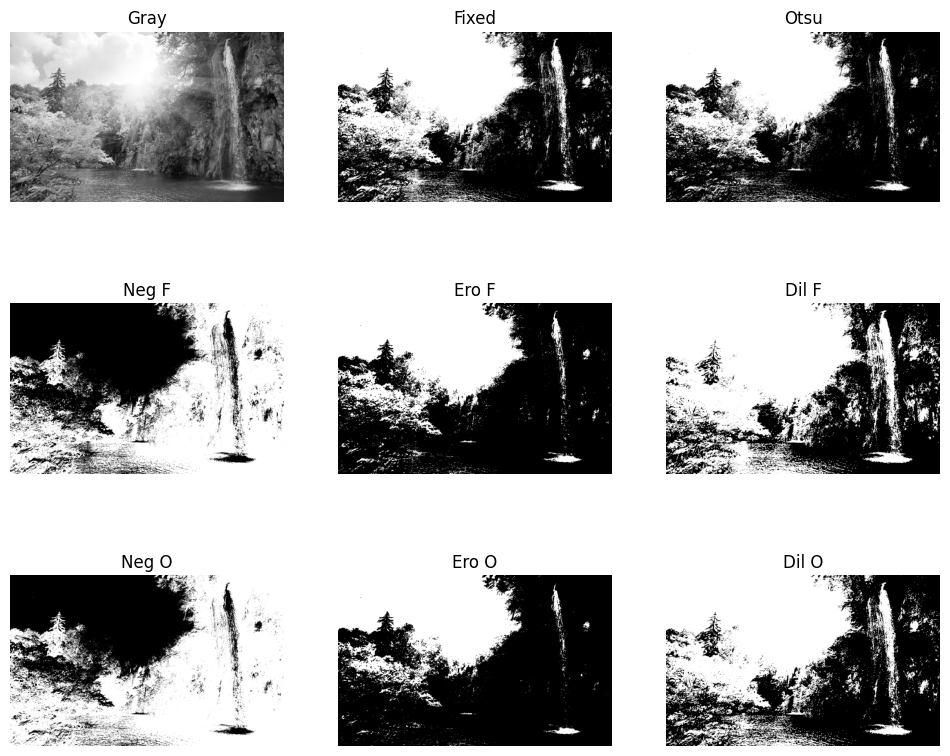

In [18]:
img = cv2.imread("bright_highlight.jpg", cv2.IMREAD_GRAYSCALE)

_, fixed = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
_, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

neg_fixed = 255 - fixed
neg_otsu = 255 - otsu

kernel = np.ones((3,3), np.uint8)

er_fixed = cv2.erode(fixed, kernel)
di_fixed = cv2.dilate(fixed, kernel)

er_otsu = cv2.erode(otsu, kernel)
di_otsu = cv2.dilate(otsu, kernel)

images = [img, fixed, otsu, neg_fixed, er_fixed, di_fixed, neg_otsu, er_otsu, di_otsu]
titles = ["Gray","Fixed","Otsu","Neg F","Ero F","Dil F","Neg O","Ero O","Dil O"]

plt.figure(figsize=(12,10))
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.show()
